Iterative Closest Point
Credit to Cyrill Stachniss’s online course

ICP with given correspondences
ICP algorithm if the point correspondences are given.
The original point clouds Line1 and Line2 are shown below

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


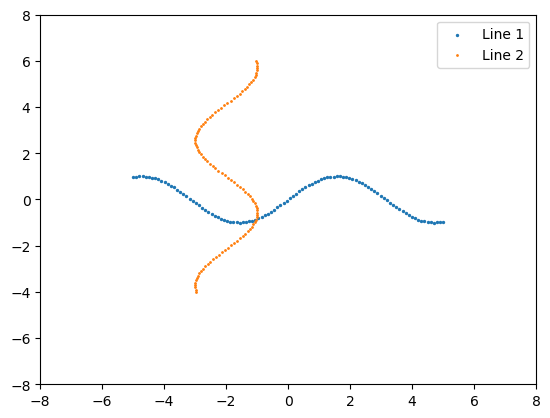

In [1]:
import ex1 as ex
import numpy as np
import ICP as icp
import matplotlib.pyplot as plt
import open3d as o3d

Data = np.load('icp_data.npz')
Line1 = Data['LineGroundTruth']
Line2 = Data['LineMovedCorresp']
    
# Show the initial positions of the lines
ex.show_figure(Line1, Line2)

After the iterative point algorithm, we can see that line1 and line2 are aligned together!

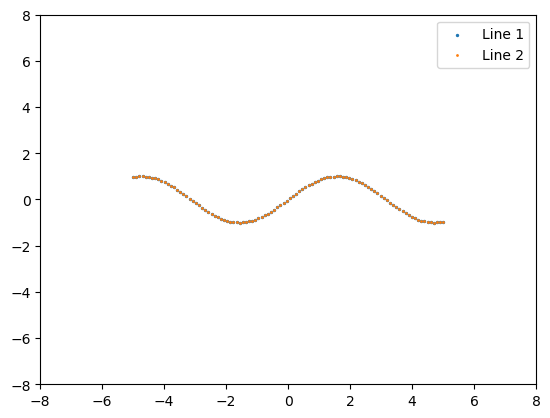

Error value is:  18.06543251182927


In [2]:
# We assume that the there are 1 to 1 correspondences for this data
QInd = np.arange(len(Line1[0]))
PInd = np.arange(len(Line2[0]))

# Perform icp given the correspondences
[Line2, E] = ex.icp_known_corresp(Line1, Line2, QInd, PInd)

# Show the adjusted positions of the lines
ex.show_figure(Line1, Line2)

# print the error
print('Error value is: ', E)

ICP without given correspondences

Now we implement the ICP algorithm without given correspondences. From the figures below, we can see that the two lines are gradually aligned together.

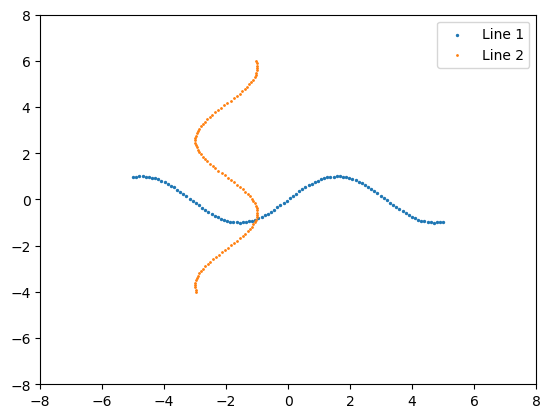

Error value on 0 iteration is:  7.336777337168476
Error value on 1 iteration is:  3.2235985601556703


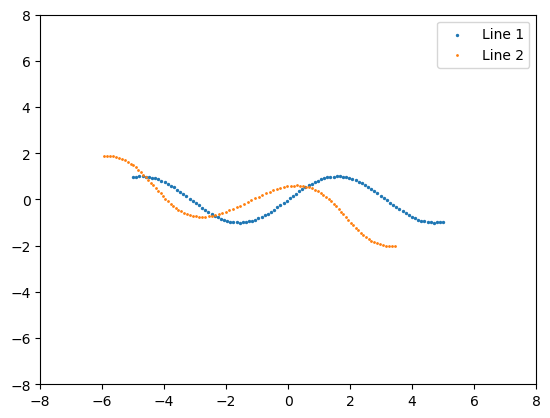

Error value on 2 iteration is:  1.099784622420993
Error value on 3 iteration is:  3.9871159157725584
Error value on 4 iteration is:  6.261099938338698
Error value on 5 iteration is:  2.135274152326907
Error value on 6 iteration is:  1.2621588412825893
Error value on 7 iteration is:  2.006963545109177
Error value on 8 iteration is:  1.0366233384531338
Error value on 9 iteration is:  0.29782328484164705


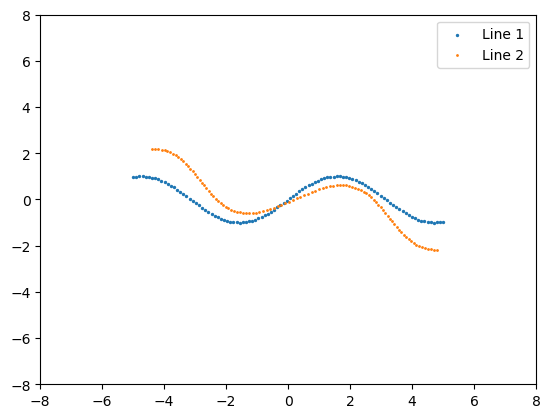

Error value on 10 iteration is:  2.2519398930960186
Error value on 11 iteration is:  1.8750278287921418
Error value on 12 iteration is:  0.31023648298285605
Error value on 13 iteration is:  2.3105826705006622
Error value on 14 iteration is:  1.2664036870043616
Error value on 15 iteration is:  1.8493700732921698
Error value on 16 iteration is:  2.3343823633604828
Error value on 17 iteration is:  1.3304666625784614


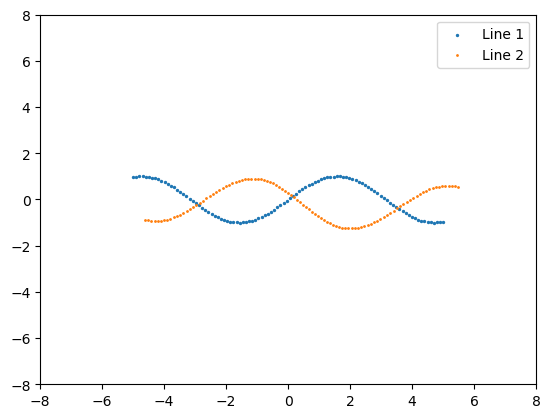

Error value on 18 iteration is:  2.0834567303200227
Error value on 19 iteration is:  8.040537860186337
Error value on 20 iteration is:  2.67514295569077
Error value on 21 iteration is:  2.2208448727193515
Error value on 22 iteration is:  2.154251548905509
Error value on 23 iteration is:  1.2721516721206716
Error value on 24 iteration is:  1.745827697807002
Error value on 25 iteration is:  6.860108495532156


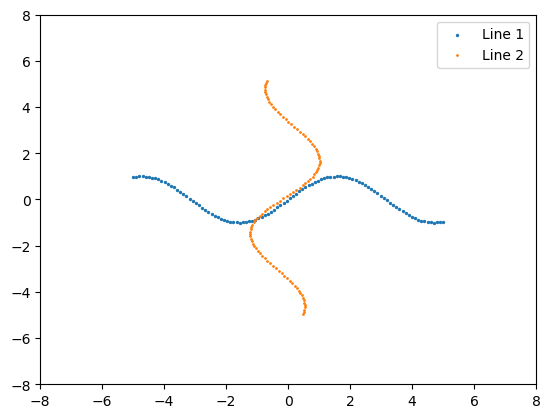

Error value on 26 iteration is:  3.4433994296827883
Error value on 27 iteration is:  3.608981085315587
Error value on 28 iteration is:  10.3736265769979
Error value on 29 iteration is:  1.17321247367973
Error value on 30 iteration is:  1.8594189901894165
Error value on 31 iteration is:  0.31810216227293076
Error value on 32 iteration is:  3.7747584237196956
Error value on 33 iteration is:  2.1081552570966595


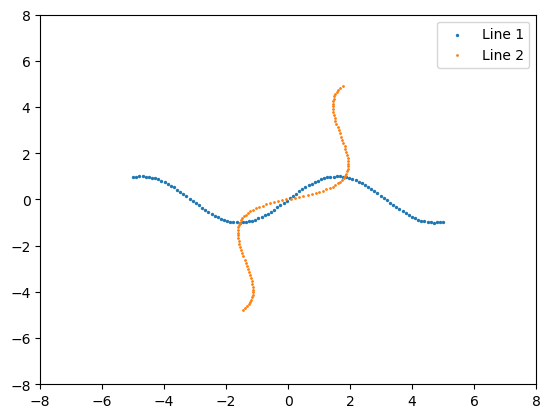

Error value on 34 iteration is:  2.0596653752874228
Error value on 35 iteration is:  2.2162429653768694
Error value on 36 iteration is:  1.797026614532415
Error value on 37 iteration is:  0.47110900875946027
Error value on 38 iteration is:  2.3526850765806757
Error value on 39 iteration is:  1.2361868113150216
Error value on 40 iteration is:  1.8515436918064712
Error value on 41 iteration is:  2.3277466099182345


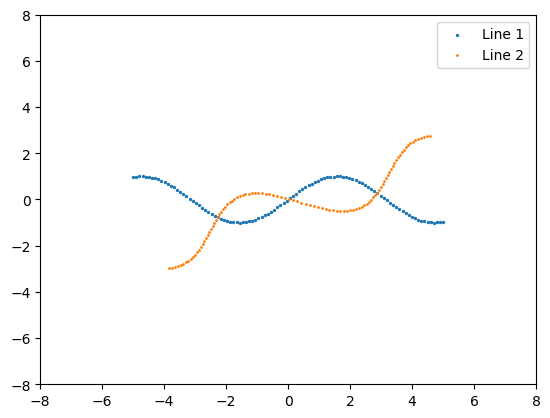

Error value on 42 iteration is:  1.9418439056992896
Error value on 43 iteration is:  0.3355478852265368
Error value on 44 iteration is:  2.4285044452281825
Error value on 45 iteration is:  1.892144901234151
Error value on 46 iteration is:  0.689132993779402
Error value on 47 iteration is:  2.3449498116241174
Error value on 48 iteration is:  1.2054027442706816
Error value on 49 iteration is:  1.8510314313014584


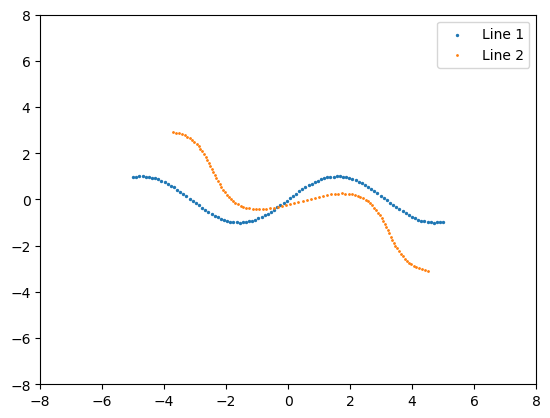

Error value on 50 iteration is:  0.1891042373740137


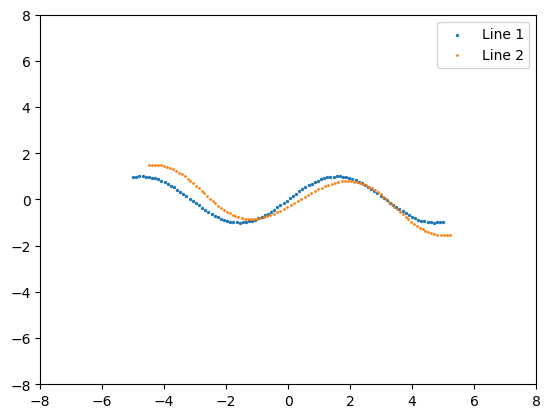

In [3]:
Data = np.load('icp_data.npz')
Line1 = Data['LineGroundTruth']
Line2 = Data['LineMovedNoCorresp']
MaxIter = 100
Epsilon = 0.25
E = np.inf
# show figure
ex.show_figure(Line1, Line2)

for i in range(MaxIter):

    # TODO: find correspondences of points
    # point with index QInd(1, k) from Line1 corresponds to
    # point with index PInd(1, k) from Line2
    PInd = np.linspace(0, np.shape(Line2)[0] - 1, np.shape(Line2)[1]).astype(int)
    distances, QInd = ex.nearest_neighbor(np.transpose(Line2), np.transpose(Line1))

    # update Line2 and error
    # Now that you know the correspondences, use your implementation
    # of icp with known correspondences and perform an update
    EOld = E
    [Line2, E] = ex.icp_known_corresp(Line1, Line2, QInd, PInd)

    print('Error value on ' + str(i) + ' iteration is: ', E)
    if E<0.3 or i%8==1:
        ex.show_figure(Line1, Line2)
    if E < Epsilon:
        break
    elif EOld-E<0.1 and E<0.3:
        break


In [3]:
import copy
def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target_temp],
                                      zoom=0.4459,
                                      front=[0.9288, -0.2951, -0.2242],
                                      lookat=[1.6784, 2.0612, 1.4451],
                                      up=[-0.3402, -0.9189, -0.1996])

Now, let us experiment an state of art ICP algorithms in open3D on a real word dataset complex urban dataset! KISS-ICP a is a simple yet highly effective approach to register 3D points. Firstly, it downsample 3D points. Then it use max correspondance distance thresholding to remove outliers. Finally, it performs a point-to-point ICP algorithm. We choose 0.04 as the voxel size for downsampling and 0.08 as maximum correspondence distance. The estimated transformation will be used as the initial guess for next estimation

RegistrationResult with fitness=8.270487e-01, inlier_rmse=6.318325e-01, and correspondence_set size of 3926
Access transformation to get result.
RegistrationResult with fitness=8.611176e-01, inlier_rmse=6.182474e-01, and correspondence_set size of 3683
Access transformation to get result.
RegistrationResult with fitness=8.626813e-01, inlier_rmse=6.297929e-01, and correspondence_set size of 3449
Access transformation to get result.
RegistrationResult with fitness=7.822233e-01, inlier_rmse=5.527032e-01, and correspondence_set size of 3089
Access transformation to get result.
RegistrationResult with fitness=7.330873e-01, inlier_rmse=6.178667e-01, and correspondence_set size of 2980
Access transformation to get result.
RegistrationResult with fitness=6.850702e-01, inlier_rmse=6.317849e-01, and correspondence_set size of 2978
Access transformation to get result.
RegistrationResult with fitness=7.041207e-01, inlier_rmse=7.793538e-01, and correspondence_set size of 3127
Access transformation 

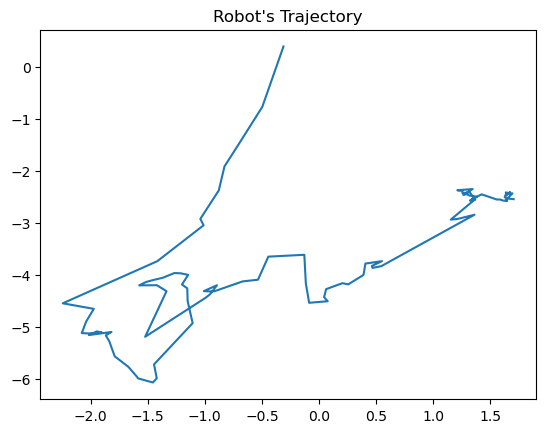

In [22]:
import os
import struct
directory_path = "../urban00/urban00_data.tar/urban00/sensor_data/VLP_left"
count = 0
initial_pose=np.eye(4)
robot_pose = np.array([[-0.514169, -0.702457, -0.492122, -0.31189],
                         [0.48979, -0.711497, 0.503862, 0.394734],
                         [-0.704085, 0.0180335, 0.709886, 1.94661], [0.0, 0.0, 0.0, 1.0]])
trans_init = np.asarray([[1, 0, 0, 0],
                         [0, 1, 0, 0],
                         [0, 0, 1, 0], [0.0, 0.0, 0.0, 1.0]])
threshold = 2
robot_X=np.array([-0.31189])
robot_Y=np.array(([0.394734]))

max_correspondence_distance = 2
point_estimation=o3d.pipelines.registration.TransformationEstimationPointToPoint()
robust_estimation=o3d.pipelines.registration.RobustKernel
for filename in os.listdir(directory_path):
    if count % 5 ==0:
        f = os.path.join(directory_path, filename)
        points = np.array([])
        X = np.array([])
        Y = np.array([])
        Z = np.array([])
        with open(f, mode="rb") as zip_file:
            contents = zip_file.read()
            num = int(len(contents) / 16)
            for i in range(num):
                x = struct.unpack('f', contents[16 * i:16 * i + 4])[0] #Get x value for a 3D point
                y = struct.unpack('f', contents[16 * i+4:16 * i + 8])[0] #Get y value for a 3D point
                z = struct.unpack('f', contents[16 * i+8:16 * i + 12])[0] # Get z value for a 3D point
                reflect_val=struct.unpack('f', contents[16 * i+12:16 * i + 16])[0] #Get reflectance value for a 3D point
                if reflect_val>1:
                    X=np.append(X,x)
                    Y=np.append(Y,y)
                    Z=np.append(Z,z)
            point_clouds = np.zeros((np.shape(Z)[0], 3))
            point_clouds[:,0]=np.reshape(X,-1)
            point_clouds[:,1]=np.reshape(Y,-1)
            point_clouds[:,2]=np.reshape(Z,-1)
            pcd = o3d.geometry.PointCloud()
            pcd.points = o3d.utility.Vector3dVector(point_clouds)
            down_pcd=pcd.voxel_down_sample(voxel_size=0.1)
            if count>0:
                reg_p2p =o3d.pipelines.registration.registration_icp(
                down_pcd, last_pcd, threshold, trans_init,point_estimation)
                robot_pose=np.matmul(reg_p2p.transformation,robot_pose)
                robot_X=np.append(robot_X,robot_pose[0][3])
                robot_Y=np.append(robot_Y,robot_pose[1][3])
                if count%20==0 and count<60:
                    draw_registration_result(down_pcd, last_pcd, reg_p2p.transformation)
                #trans_init=reg_p2p.transformation
                print(reg_p2p)
            last_pcd=copy.deepcopy(down_pcd)
    count=count+1
    if count>500:
        break
plt.plot(robot_X,robot_Y)
plt.title("Robot's Trajectory")
plt.show()